# Vectors Practice

In this chapter we will work with vectors and code Gramm-Schmidt Orthonormalization Algorithm

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import lovely_numpy as ln
import json_tricks



In [51]:
inputs = json_tricks.load('inputs/inputs.json')
answers = {}

In your input you have arrys of shape $N \times 2$, which means that you have 2 vectors both having N coordinates

In [52]:
for one_input in inputs:
    print(ln.lovely(one_input['X']))

array[2, 2] i64 n=4 x∈[-10, 5] μ=-2.500 σ=6.185 [[2, 5], [-10, -7]]
array[5, 2] i64 n=10 x∈[-9, 9] μ=-1.500 σ=5.784 [[-7, -3], [-1, 9], [8, -6], [-4, 2], [-9, -4]]
array[9, 2] i64 n=18 x∈[-10, 9] μ=2.833 σ=6.039
array[5, 2] i64 n=10 x∈[-10, 8] μ=-2.700 σ=5.900 [[4, -3], [-10, -9], [-1, -10], [0, -7], [1, 8]]
array[9, 2] i64 n=18 x∈[-10, 7] μ=-4.056 σ=4.696
array[9, 2] i64 n=18 x∈[-10, 8] μ=-0.944 σ=5.038
array[9, 2] i64 n=18 x∈[-10, 8] μ=-1.778 σ=6.554
array[4, 2] i64 n=8 x∈[-10, 8] μ=0.500 σ=5.220 [[3, 6], [-3, -1], [-10, 0], [8, 1]]
array[4, 2] i64 n=8 x∈[-8, 8] μ=-2.250 σ=6.741 [[-8, -8], [-7, -7], [8, 4], [-7, 7]]
array[4, 2] i64 n=8 x∈[-9, 4] μ=-1.500 σ=3.905 [[4, -1], [-9, -6], [0, 1], [-2, 1]]
array[4, 2] i64 n=8 x∈[-10, 9] μ=0.500 σ=7.314 [[9, 6], [-10, -10], [-4, 9], [4, 0]]
array[5, 2] i64 n=10 x∈[-8, 6] μ=-1.600 σ=4.673 [[-2, 3], [-8, -7], [-8, 1], [3, 6], [-2, -2]]
array[5, 2] i64 n=10 x∈[-10, 4] μ=-3.000 σ=4.919 [[-2, -8], [-7, 2], [4, -10], [-6, -7], [3, 1]]
array[6, 2] i

# Task 1. Vector lenghts

- Write a function that calculates vector lengths, answer should return array of shape $2$
- Apply this function to all the inputs

In [53]:
def get_length(X):
    res = np.array([np.linalg.norm(i) for i in X])
    return res

In [54]:
answers['lengths'] = [
    get_length(**inp) for inp in inputs
]

print(answers['lengths'])

[array([ 5.38516481, 12.20655562]), array([ 7.61577311,  9.05538514, 10.        ,  4.47213595,  9.8488578 ]), array([ 8.06225775,  5.83095189,  2.23606798, 10.81665383, 10.29563014,
        7.07106781, 12.80624847,  9.89949494, 12.72792206]), array([ 5.        , 13.45362405, 10.04987562,  7.        ,  8.06225775]), array([12.80624847, 11.66190379,  6.40312424,  7.28010989,  7.81024968,
        1.        , 12.72792206,  3.16227766,  8.06225775]), array([ 4.12310563, 12.80624847,  8.06225775,  2.        ,  6.08276253,
        7.21110255,  8.60232527,  6.32455532,  4.47213595]), array([ 8.60232527,  6.70820393,  8.60232527,  7.07106781, 11.18033989,
       12.20655562, 10.        , 10.        , 10.63014581]), array([ 6.70820393,  3.16227766, 10.        ,  8.06225775]), array([11.3137085 ,  9.89949494,  8.94427191,  9.89949494]), array([ 4.12310563, 10.81665383,  1.        ,  2.23606798]), array([10.81665383, 14.14213562,  9.8488578 ,  4.        ]), array([ 3.60555128, 10.63014581,  8.0622

# Task 2. Vector directions

- Write a function that calculates vector directions. Result should be of the same shape as the original array X
- Use $10^{-8}$ addition in division to avoid division by zero
- Apply this function to all arrays in the inputs

In [55]:
def get_directions(X):    
    column_norms = np.linalg.norm(X, axis=0, keepdims=True) + 1e-8
    return X / column_norms

In [56]:
answers['directions'] = [
    get_directions(**inp) for inp in inputs
]

print(answers['directions'])

[array([[ 0.19611613,  0.58123819],
       [-0.98058067, -0.81373347]]), array([[-0.48189987, -0.24828177],
       [-0.06884284,  0.7448453 ],
       [ 0.55074271, -0.49656353],
       [-0.27537136,  0.16552118],
       [-0.61958555, -0.33104236]]), array([[ 0.18609684,  0.38018781],
       [-0.23262105,  0.16293763],
       [-0.09304842, -0.05431254],
       [ 0.41871789,  0.32587527],
       [ 0.41871789, -0.27156272],
       [ 0.23262105,  0.27156272],
       [-0.4652421 ,  0.43450036],
       [-0.32566947,  0.38018781],
       [ 0.41871789,  0.4888129 ]]), array([[ 0.36822985, -0.1723455 ],
       [-0.92057462, -0.51703649],
       [-0.09205746, -0.57448499],
       [ 0.        , -0.40213949],
       [ 0.09205746,  0.45958799]]), array([[-0.42281314, -0.54635836],
       [-0.52851642, -0.32781502],
       [-0.26425821, -0.21854335],
       [-0.10570328,  0.38245086],
       [ 0.26425821, -0.32781502],
       [-0.05285164,  0.        ],
       [-0.47566478, -0.49172253],
       [-0.

# Step 3. Visualization

We will visualize vectors and directions using `matplotlib` 

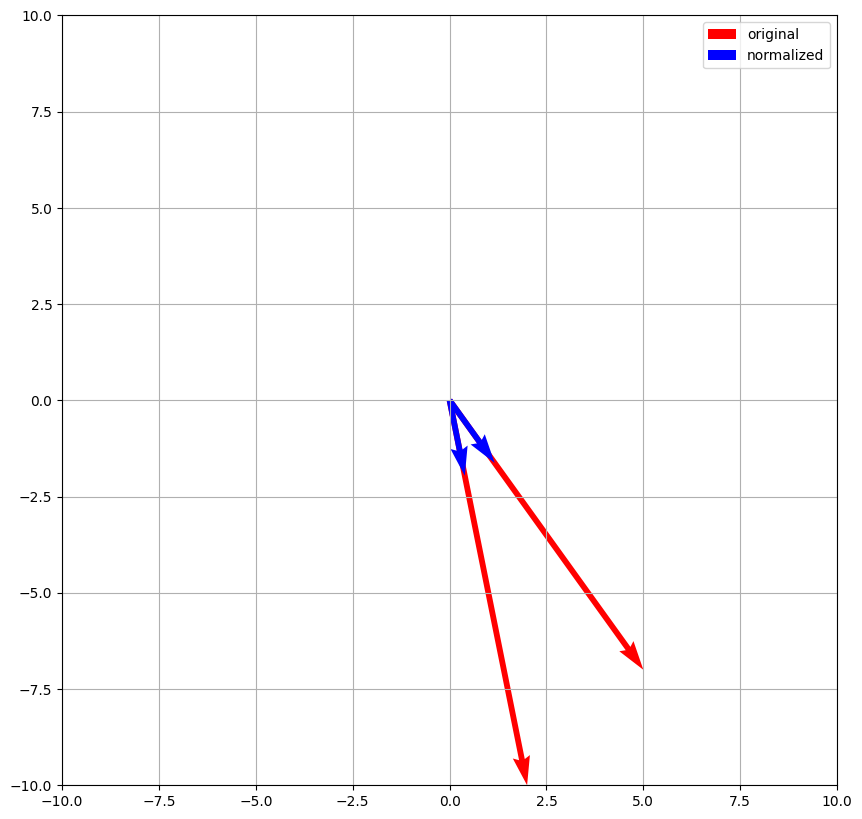

In [57]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
ax = plt.gca()
X = inputs[0]['X']
vecs = np.concatenate([np.zeros_like(X), X.T], axis=1)
X, Y, U, V = zip(*vecs)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'red')

X = answers['directions'][0] * 2
norms = np.concatenate([np.zeros_like(X), X.T], axis=1)
X, Y, U, V = zip(*norms)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'blue')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
plt.draw()
plt.grid()
plt.legend(['original', 'normalized'])
plt.show()


# Task 4. Scalar Product

Write a function that calculates
- cosine distance between the vectors
- use $10^{-8}$ additional constant in the denominator for the sake of numerical stability

In [58]:
def get_cosine(X):
    col1, col2 = X.T[0], X.T[1]
    dot_product = np.dot(col1, col2)
    norm_col1 = np.linalg.norm(col1)
    norm_col2 = np.linalg.norm(col2)
    cosine_similarity = dot_product / (norm_col1 * norm_col2 + 1e-8)

    return cosine_similarity

In [59]:
answers['cosine'] = [
    get_cosine(**inp) for inp in inputs
]
print(answers['cosine'])

[np.float64(0.9119215050711565), np.float64(-0.04557979120739811), np.float64(0.0025268482615408176), np.float64(0.5077020477898537), np.float64(0.6583713598489374), np.float64(-0.6600759026035302), np.float64(-0.2566899599543723), np.float64(0.3487149008848826), np.float64(0.4786378205350264), np.float64(0.7648006474096307), np.float64(0.5488609571548437), np.float64(0.5341686248472929), np.float64(0.044403516749982254), np.float64(0.009893476586145507), np.float64(-0.698166399236062), np.float64(0.33455600123349033), np.float64(0.3961773866809058), np.float64(0.4627565561186625), np.float64(-0.3968748790146343), np.float64(0.15053763439241533), np.float64(0.39976943026617634), np.float64(-0.8146409961065295), np.float64(-0.5774647205693132), np.float64(-0.08413186845453544), np.float64(-0.3576627897881358), np.float64(-0.48428331652295836), np.float64(0.46788772029741105), np.float64(0.5738190416960288), np.float64(-0.16477297739833272), np.float64(-0.06311944030646026), np.float64(0

# Task 5. Orthonormalization

Create a pair of orthonormal vectors
- Take the first vector and normalize it
- Take the second vector, remove the collinear component to the first one
- Normalize it

In [60]:
def get_orthonormal(X):
    res = np.zeros_like(X, dtype=np.float32)
    res[:, 0] = X[:, 0] / np.linalg.norm(X[:, 0] + 1e-8)
    proj = np.dot(res[:, 0], X[:, 1]) * res[:, 0]
    u2 = X[:, 1] - proj
    res[:, 1] = u2 / np.linalg.norm(u2 + 1e-8)
    return res

In [61]:
answers['orthonormal'] = [
    get_orthonormal(**inp) for inp in inputs
]

print(answers['orthonormal'])

[array([[ 0.19611613,  0.9805807 ],
       [-0.9805807 ,  0.19611618]], dtype=float32), array([[-0.4818999 , -0.2705278 ],
       [-0.06884284,  0.74247915],
       [ 0.5507427 , -0.4719513 ],
       [-0.27537134,  0.15312897],
       [-0.6195856 , -0.35965672]], dtype=float32), array([[ 0.18609685,  0.37971878],
       [-0.23262106,  0.16352595],
       [-0.09304842, -0.0540776 ],
       [ 0.4187179 ,  0.32481828],
       [ 0.4187179 , -0.27262163],
       [ 0.23262106,  0.2709758 ],
       [-0.46524212,  0.43567735],
       [-0.32566947,  0.38101193],
       [ 0.4187179 ,  0.48775643]], dtype=float32), array([[ 0.36822984, -0.4170434 ],
       [-0.9205746 , -0.05764016],
       [-0.09205746, -0.61256784],
       [ 0.        , -0.46677217],
       [ 0.09205746,  0.47920436]], dtype=float32), array([[-0.42281315, -0.35604185],
       [-0.5285164 ,  0.02676396],
       [-0.2642582 , -0.05920514],
       [-0.10570329,  0.60056716],
       [ 0.2642582 , -0.6666661 ],
       [-0.05285164, 

# 6. Visualization

[[  2   5]
 [-10  -7]]
[[ 0.39223227  1.9611614 ]
 [-1.9611614   0.39223236]]


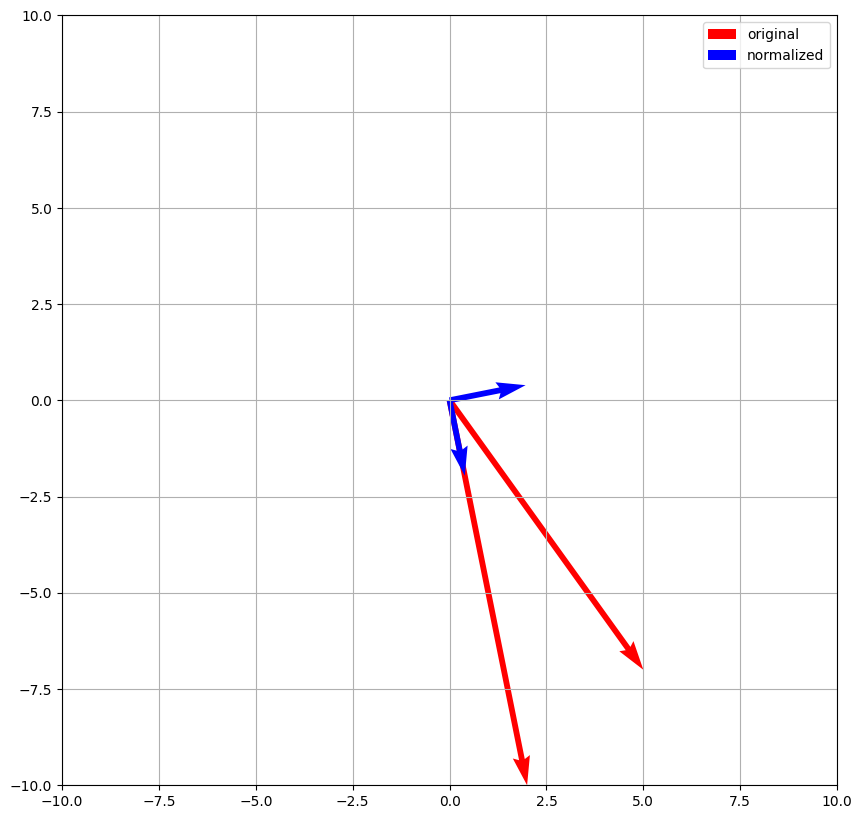

In [62]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
ax = plt.gca()
X = inputs[0]['X']
print(X)
vecs = np.concatenate([np.zeros_like(X), X.T], axis=1)
X, Y, U, V = zip(*vecs)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'red')

X = answers['orthonormal'][0] * 2
print(X)
norms = np.concatenate([np.zeros_like(X), X.T], axis=1)
X, Y, U, V = zip(*norms)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'blue')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
plt.draw()
plt.grid()
plt.legend(['original', 'normalized'])
plt.show()


# 7. Saving the answer

In [63]:
json_tricks.dump(answers, '.answer.json')

'{"lengths": [{"__ndarray__": [5.385164807134504, 12.206555615733702], "dtype": "float64", "shape": [2]}, {"__ndarray__": [7.615773105863909, 9.055385138137417, 10.0, 4.47213595499958, 9.848857801796104], "dtype": "float64", "shape": [5]}, {"__ndarray__": [8.06225774829855, 5.830951894845301, 2.23606797749979, 10.816653826391969, 10.295630140987, 7.0710678118654755, 12.806248474865697, 9.899494936611665, 12.727922061357855], "dtype": "float64", "shape": [9]}, {"__ndarray__": [5.0, 13.45362404707371, 10.04987562112089, 7.0, 8.06225774829855], "dtype": "float64", "shape": [5]}, {"__ndarray__": [12.806248474865697, 11.661903789690601, 6.4031242374328485, 7.280109889280518, 7.810249675906654, 1.0, 12.727922061357855, 3.1622776601683795, 8.06225774829855], "dtype": "float64", "shape": [9]}, {"__ndarray__": [4.123105625617661, 12.806248474865697, 8.06225774829855, 2.0, 6.082762530298219, 7.211102550927978, 8.602325267042627, 6.324555320336759, 4.47213595499958], "dtype": "float64", "shape": 